In [8]:
import pandas as pd
data=pd.read_csv('../data/Table1_update.csv')
data['age']=2019-data['Year_of_publication']+1
data['citation_per_year']=data['Number_of_Citations']/data['age']
data.head(3)

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,chain_of_seeds,Read_Length,Max_Read_length_tested,Title,Number_of_Citations,...,variable_length_seed,spaced_seed,chain_of_seeds.1,Application,email_first_author,email_last_author,Verified,Spliting_the_read,age,citation_per_year
0,93.0,2019.0,deSALT,https://github.com/hitbc/deSALT,Liu et al. 2019,Y,Long,8000 bp,deSALT: fast and accurate long transcriptomic ...,0.0,...,N,N,Y,RNA-seq,NaN,NaN,NaN,NaN,1.0,0.0
1,91.0,2018.0,lordFAST,https://github.com/vpc-ccg/lordfast,Haghshenas et al. ‎2018,Y,Long,7kbp = 183.61million/25000,lordFAST: sensitive and Fast Alignment Search ...,2.0,...,N,N,Y,DNA,ehaghshe@sfu.ca,faraz.hach@ubc.ca,NaN,NaN,2.0,1.0
2,92.0,2018.0,Magic-BLAST,https://github.com/ncbi/magicblast,Boratyn et al. ‎2018,N,Long,10000-90000,"Magic-BLAST, an accurate DNA and RNA-seq align...",6.0,...,N,N,N,DNA/RNA-Seq,NaN,madden@ncbi.nlm.nih.gov,NaN,NaN,2.0,3.0


In [37]:
idx_mem = pd.read_csv('../data/compare.tools.index.csv')
mem = pd.read_csv('../data/compare.tools.memory.csv')

In [10]:
data_year = data.loc[:,['Year_of_publication', 'Aligner', 'Application', 'Indexing', 
                        'Pairwise_alignment', 'DP_pairwise',
                        'fix_length_seed','variable_length_seed',
                        'spaced_seed','chain_of_seeds']]
data_year.loc[:,'aligner_lower'] = data_year['Aligner'].str.lower()
mem.loc[:,'tools_lower'] = mem['Tools'].str.lower()
memyear = pd.merge(mem, data_year, left_on='tools_lower', right_on='aligner_lower', how='inner')
memyear.loc[:,'average_memory'] = memyear.iloc[:,1:11].mean(axis=1)
memyear = memyear.loc[memyear.loc[:,'Application'] != 'RNA-Seq']
memyear.loc[memyear.loc[:,'Tools'] == 'Bowtie2','Pairwise_alignment'] = 'NW'
memyear_summ = memyear.loc[:,['Tools', 'Year_of_publication', 'average_memory', 'Application', 'Indexing', 
                             'Pairwise_alignment', 'DP_pairwise',
                             'fix_length_seed','variable_length_seed',
                             'spaced_seed','chain_of_seeds']]
memyear_summ.sort_values(by=['Year_of_publication'], inplace=True)
for i in range(0,11):
    memyear.loc[i,'year_split'] = 'Before 2013' if memyear.loc[i,'Year_of_publication'] < 2013 else '2013 and later'
memyear_new = pd.melt(memyear, id_vars = ['Tools', 'year_split', 'Application', 'Indexing', 
                                          'Pairwise_alignment'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'memory')
memyear.to_csv(path_or_buf='../data/memory_comparison_with_tool_info.csv')
memyear

,Tools,ERR009309,ERR013127,ERR013138,ERR045708,ERR050158,ERR162843,ERR181410,ERR183377,SRR061640,...,Indexing,Pairwise_alignment,DP_pairwise,fix_length_seed,variable_length_seed,spaced_seed,chain_of_seeds,aligner_lower,average_memory,year_split
0,Bowtie2,3.580,3.580,3.580,3.579,3.580,3.580,3.580,3.580,3.580,...,BWT-FM,NW,Y,Y,N,N,Y,bowtie2,3.5799,Before 2013
1,Bowtie,3.194,3.194,3.194,3.194,3.194,3.194,3.194,3.194,3.194,...,BWT-FM,HD,N,Y,N,N,N,bowtie,3.1940,Before 2013
2,BWA,5.564,5.649,5.515,5.564,7.127,5.516,5.516,5.516,5.627,...,BWT-FM,SW,Y,N,Y,N,N,bwa,5.7110,Before 2013
3,ERNE,4.841,5.712,4.841,5.712,5.712,5.712,5.712,5.156,5.712,...,hashing,HD,N,Y,N,N,N,erne,5.3951,2013 and later
4,gsnap,28.060,27.963,31.837,28.149,28.807,28.213,28.336,27.997,27.899,...,hashing,Non-DP Heuristic,N,Y,N,N,Y,gsnap,28.8536,Before 2013
5,hisat2,4.694,4.694,4.694,4.695,4.694,4.694,4.694,4.694,4.694,...,BWT-FM,Non-DP Heuristic,N,Y,N,N,N,hisat2,4.6941,2013 and later
6,last,15.359,15.357,15.359,15.357,15.367,15.358,15.358,15.358,15.358,...,suffix array,SW,Y,N,Y,N,Y,last,15.3589,Before 2013
7,minimap2,12.422,12.360,12.431,12.551,12.965,12.308,12.364,12.403,12.358,...,hashing,NW,Y,Y,N,N,Y,minimap2,12.4488,2013 and later
8,rmap,6.895,9.359,10.524,13.982,8.660,10.146,9.268,8.444,8.538,...,hashing,HD,N,Y,N,N,N,rmap,9.5320,Before 2013
9,smalt,3.675,3.676,3.675,3.677,3.677,3.676,3.677,3.677,3.678,...,hashing,SW,Y,Y,N,N,Y,smalt,3.6766,Before 2013


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp

clrs = ['cornflowerblue', 'darkorange', 'limegreen', 'crimson', 'plum', 'peru', 'aquamarine', 
        'pink', 'darkgrey', 'yellowgreen', 'lightcoral', 'gold']

order_by_year = ["rmap", "Bowtie", "BWA", "gsnap", "smalt", "last", "snap", "Bowtie2", "hisat2", "ERNE", "minimap2"]

sns.set_style('white')
sns.set_context('talk')

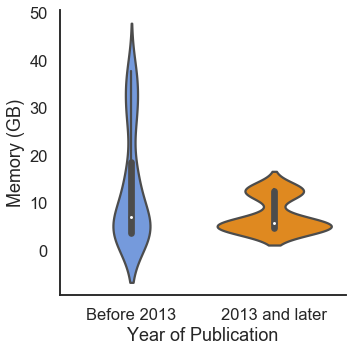

In [12]:
mwu = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['year_split'] == 'Before 2013'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['year_split'] == '2013 and later'].loc[:,'memory'],
                             alternative = 'greater')

ax = sns.catplot(data = memyear_new, x = 'year_split', y = 'memory', kind = 'violin', 
                 order = ['Before 2013', '2013 and later'], palette=clrs)
ax.set(xlabel = 'Year of Publication', ylabel = 'Memory (GB)')
#plt.plot([0,0,1,1], [50,52,52,50], lw = 1.5, c = 'k')
#plt.text(.5, 51, '*', ha = 'center', va = 'bottom', color = 'k')
#plt.tight_layout()
#plt.show()

plt.savefig('../figures/Memory_by_Year.png')
plt.savefig('../figures/Memory_by_Year.pdf')

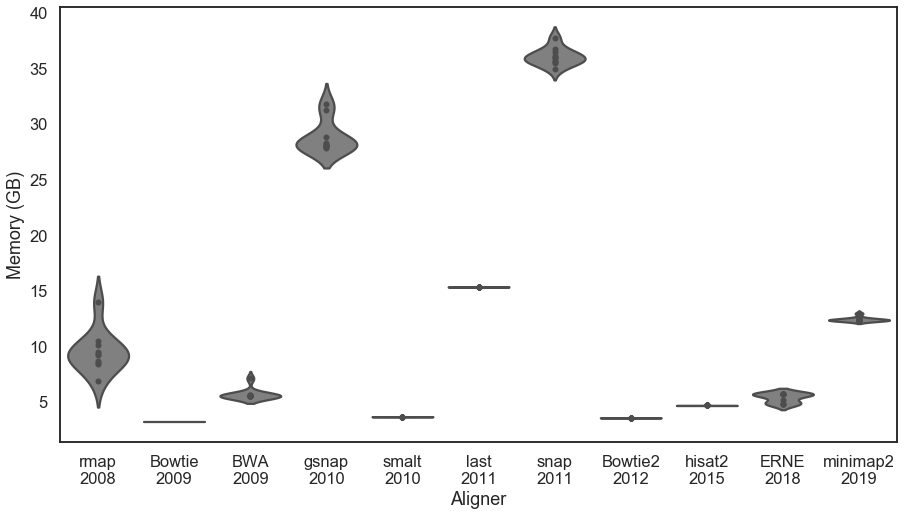

In [17]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(data = memyear_new, x = 'Tools', y = 'memory', scale='width', order=order_by_year, 
                    color="grey", inner='points')
ax.set(xlabel = 'Aligner', ylabel = 'Memory (GB)')
ax.set_xticklabels(#rotation=40, ha="right", 
                   labels=["rmap\n2008", "Bowtie\n2009", "BWA\n2009", "gsnap\n2010", "smalt\n2010", "last\n2011", 
                           "snap\n2011", "Bowtie2\n2012", "hisat2\n2015", "ERNE\n2018", "minimap2\n2019"])

#plt.show()
plt.savefig('../figures/Memory_by_Tool.png')
plt.savefig('../figures/Memory_by_Tool.pdf')

<Figure size 864x576 with 0 Axes>

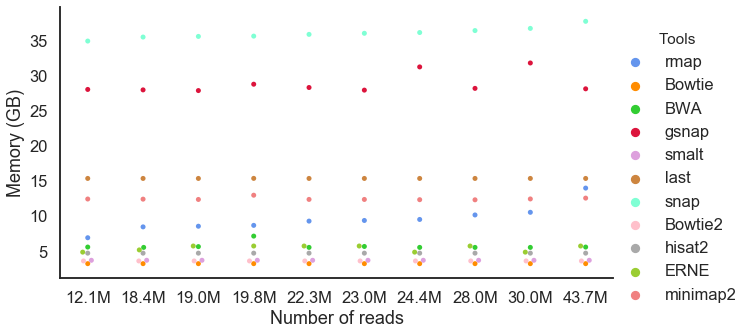

In [35]:
plt.figure(figsize=(12,8))
ax = sns.catplot(data=memyear_new, x = 'variable', y = 'memory', hue = 'Tools', hue_order = order_by_year,
                  palette = clrs[0:11],
                order = ['ERR009309', 'ERR183377', 'SRR061640', 'ERR050158', 'ERR181410', 'ERR013127', 'SRR360549',
                        'ERR162843', 'ERR013138', 'ERR045708'],
                kind = 'swarm', aspect=1.8)

ax.set(xlabel = 'Number of reads', ylabel = 'Memory (GB)')
ax.set_xticklabels(#rotation=25, ha="right", 
                   labels=['12.1M','18.4M','19.0M','19.8M', '22.3M', '23.0M', '24.4M',
                                                    '28.0M', '30.0M', '43.7M'])

#plt.show()

plt.savefig('../figures/memory_by_numreads.png')
plt.savefig('../figures/memory_by_numreads.pdf')

MannwhitneyuResult(statistic=0.0, pvalue=5.03447169901396e-07)


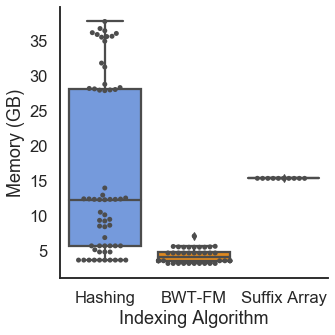

In [23]:
mwu1 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Indexing'] == 'BWT-FM'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Indexing'] == 'suffix array'].loc[:,'memory'],
                             alternative = 'less')

mwu2 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Indexing'] == 'BWT-FM'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Indexing'] == 'hashing'].loc[:,'memory'],
                             alternative = 'less')
mwu3 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Indexing'] == 'suffix array'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Indexing'] == 'hashing'].loc[:,'memory'],
                             alternative = 'two-sided')
print(mwu1)
ax = sns.catplot(data = memyear_new, x = 'Indexing', y = 'memory', order=['hashing','BWT-FM','suffix array'],
                palette=clrs, kind = 'box')
ax = sns.swarmplot(data = memyear_new, x = 'Indexing', y = 'memory', order=['hashing','BWT-FM','suffix array'],
                color=".3")
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'Memory (GB)')
ax.set_xticklabels(labels=["Hashing", "BWT-FM", "Suffix Array"])


#plt.plot([0,0,1,1], [40,42,42,40], lw = 1.5, c = 'k')
#plt.text(.5, 41, '*', ha = 'center', va = 'bottom', color = 'k')
#plt.plot([1,1,2,2], [44,46,46,44], lw = 1.5, c = 'k')
#plt.text(1.5, 45, '*', ha = 'center', va = 'bottom', color = 'k')
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Memory_by_Index_box.png')
plt.savefig('../figures/Memory_by_Index_box.pdf')

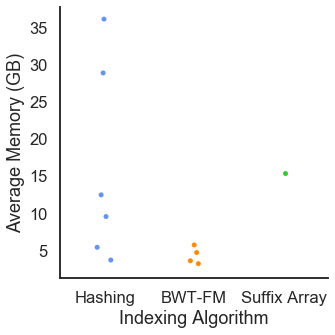

In [14]:
ax = sns.catplot(data = memyear_summ, x = 'Indexing', y = 'average_memory', 
                 order=['Hashing','BWT-FM','Suffix Array'], palette=clrs)
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'Average Memory (GB)')
#plt.show()

plt.savefig('../figures/Memory_by_Index_avg.png')
plt.savefig('../figures/Memory_by_Index_avg.pdf')

MannwhitneyuResult(statistic=247.0, pvalue=3.771602589601175e-13)


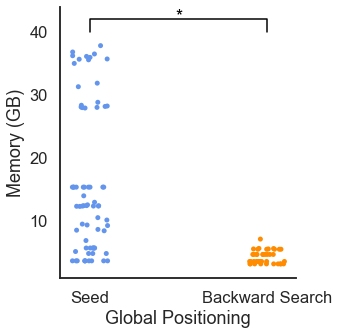

In [15]:
mwu = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Global_Positioning'] == 'Backward Search'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Global_Positioning'] == 'Seed'].loc[:,'memory'],
                             alternative = 'less')

print(mwu)
ax = sns.catplot(data = memyear_new, x = 'Global_Positioning', y = 'memory', order=['Seed','Backward Search'],
                palette=clrs)
ax.set(xlabel = 'Global Positioning', ylabel = 'Memory (GB)')
plt.plot([0,0,1,1], [40,42,42,40], lw = 1.5, c = 'k')
plt.text(.5, 41, '*', ha = 'center', va = 'bottom', color = 'k')
#plt.show()
plt.tight_layout()

plt.savefig('../figures/Memory_by_Global.png')
plt.savefig('../figures/Memory_by_Global.pdf')

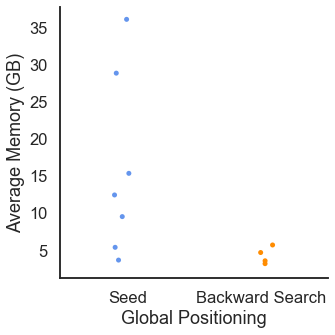

In [16]:
ax = sns.catplot(data = memyear_summ, x = 'Global_Positioning', y = 'average_memory', 
                 order=['Seed','Backward Search'], palette=clrs)
ax.set(xlabel = 'Global Positioning', ylabel = 'Average Memory (GB)')
#plt.show()
plt.savefig('../figures/Memory_by_Global_avg.png')
plt.savefig('../figures/Memory_by_Global_avg.pdf')

In [17]:
ax = sns.violinplot(data = memyear_new, x = 'Pairwise_alignment_2', y = 'memory', hue = 'Global_Positioning', 
                    split=True, scale='count', inner = None, hue_order=['Seed','Backward Search'],
                    order=['Local','Hamming Distance','Global','Non-DP Heuristic','Local & Global'],
                   palette=clrs)

ValueError: Could not interpret input 'Pairwise_alignment_2'

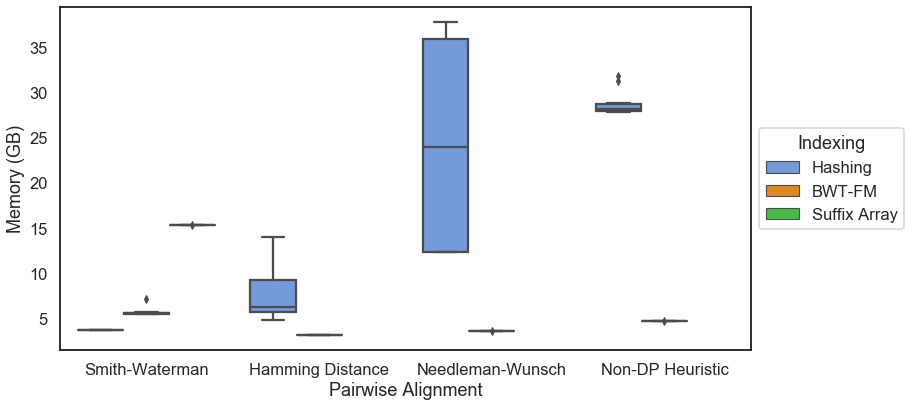

In [34]:
mwu1 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Pairwise_alignment'] == 'SW'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Pairwise_alignment'] == 'Non-DP Heuristic'].loc[:,'memory'],
                             alternative = 'two-sided')
mwu2 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Pairwise_alignment'] == 'HD'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Pairwise_alignment'] == 'Non-DP Heuristic'].loc[:,'memory'],
                             alternative = 'two-sided')
mwu3 = scp.stats.mannwhitneyu(memyear_new.loc[memyear_new['Pairwise_alignment'] == 'HD'].loc[:,'memory'], 
                              memyear_new.loc[memyear_new['Pairwise_alignment'] == 'NW'].loc[:,'memory'],
                             alternative = 'two-sided')

plt.figure(figsize=(13,6))
ax = sns.boxplot(data = memyear_new, x = 'Pairwise_alignment', y = 'memory',
                 order=['SW','HD','NW','Non-DP Heuristic'], hue = 'Indexing', 
                 hue_order = ['hashing', 'BWT-FM', 'suffix array'], palette=clrs) 
                 #legend=False, kind='box')
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Memory (GB)')
leg = plt.legend(title='Indexing', loc='center left', bbox_to_anchor=(1, .5))
leg.get_texts()[0].set_text("Hashing")
leg.get_texts()[2].set_text("Suffix Array")
ax.set_xticklabels(#rotation=25, ha="right", 
                   labels=['Smith-Waterman','Hamming Distance','Needleman-Wunsch','Non-DP Heuristic'])
#plt.plot([0,0,3,3], [62,64,64,62], lw = 1.5, c = 'k')
#plt.text(1.5, 63, '*', ha = 'center', va = 'bottom', color = 'k')
#plt.plot([1,1,3,3], [54,56,56,54], lw = 1.5, c = 'k')
#plt.text(2, 55, '*', ha = 'center', va = 'bottom', color = 'k')
#plt.plot([1,1,2,2], [44,46,46,44], lw = 1.5, c = 'k')
#plt.text(1.5, 45, '*', ha = 'center', va = 'bottom', color = 'k')
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Memory_by_Local_box.png')
plt.savefig('../figures/Memory_by_Local_box.pdf')

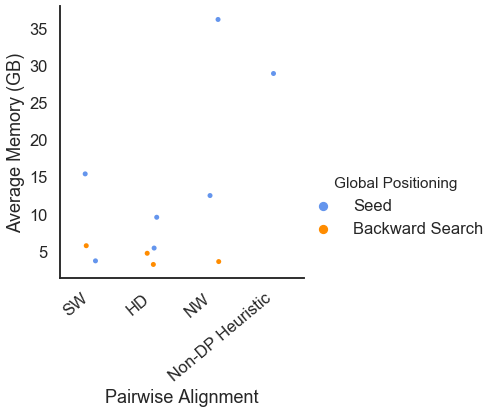

In [19]:
ax = sns.catplot(data = memyear_summ, x = 'Pairwise_alignment', y = 'average_memory', hue = 'Global_Positioning',
                hue_order=['Seed','Backward Search'], 
                 order=['SW','HD','NW','Non-DP Heuristic'],
                palette=clrs)
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Average Memory (GB)')
ax._legend.set_title('Global Positioning')
ax.set_xticklabels(rotation=40, ha="right")
#plt.show()

plt.savefig('../figures/Memory_by_Local_avg.png')
plt.savefig('../figures/Memory_by_Local_avg.pdf')

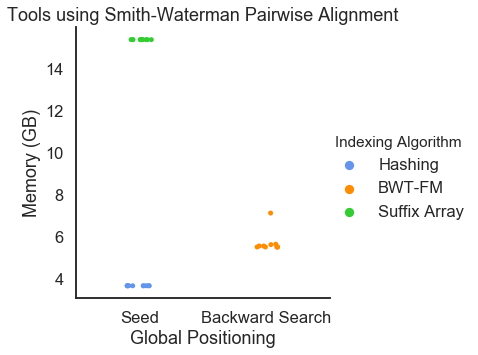

In [20]:
ax = sns.catplot(data = memyear_new.loc[memyear_new['Pairwise_alignment'] == 'SW'], x = 'Global_Positioning', 
                y = 'memory', hue = 'Indexing', hue_order=['Hashing','BWT-FM','Suffix Array'],
                order=['Seed','Backward Search'], palette=clrs)
ax._legend.set_title('Indexing Algorithm')
ax.set(xlabel = 'Global Positioning', ylabel = 'Memory (GB)', title = 'Tools using Smith-Waterman Pairwise Alignment')

plt.savefig('../figures/Memory_using_Local.png')
plt.savefig('../figures/Memory_using_Local.pdf')

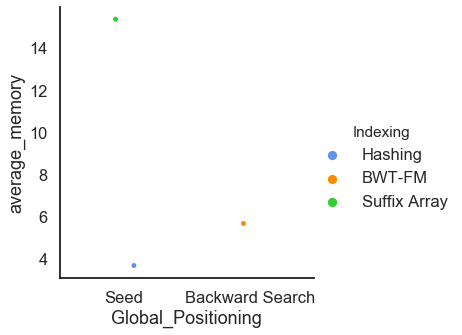

In [21]:
sns.catplot(data = memyear_summ.loc[memyear_summ['Pairwise_alignment'] == 'SW'], x = 'Global_Positioning', 
                y = 'average_memory', hue = 'Indexing', hue_order=['Hashing','BWT-FM','Suffix Array'], 
                order=['Seed','Backward Search'], palette=clrs)
ax._legend.set_title('Indexing Algorithm')
ax.set(xlabel = 'Global Positioning', ylabel = 'Average Memory (GB)', title = 'Tools using Smith-Waterman Pairwise Alignment')

plt.savefig('../figures/Memory_using_Local_avg.png')
plt.savefig('../figures/Memory_using_Local_avg.pdf')

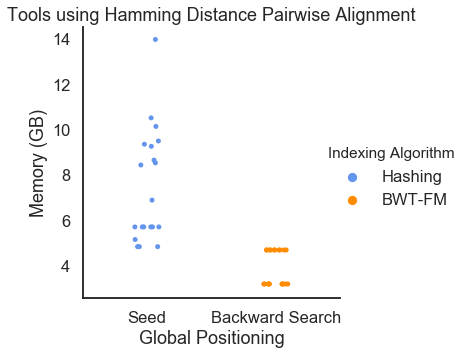

In [22]:
ax = sns.catplot(data = memyear_new.loc[memyear_new['Pairwise_alignment'] == 'HD'],
                 x = 'Global_Positioning', y = 'memory', hue = 'Indexing', hue_order=['Hashing','BWT-FM'],
                order=['Seed','Backward Search'], palette=clrs)
ax._legend.set_title('Indexing Algorithm')

ax.set(xlabel = 'Global Positioning', ylabel = 'Memory (GB)', title = 'Tools using Hamming Distance Pairwise Alignment')

plt.savefig('../figures/Memory_using_HD.png')
plt.savefig('../figures/Memory_using_HD.pdf')


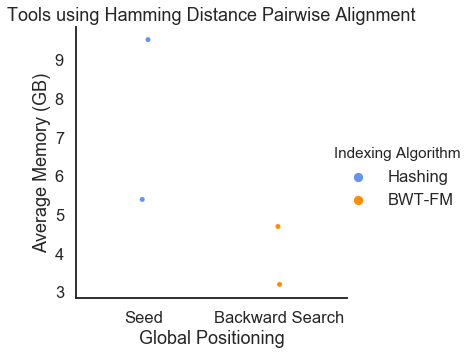

In [23]:
ax = sns.catplot(data = memyear_summ.loc[memyear_summ['Pairwise_alignment'] == 'HD'],
                 x = 'Global_Positioning', y = 'average_memory', hue = 'Indexing', hue_order=['Hashing','BWT-FM'],
                order=['Seed','Backward Search'], palette=clrs)
ax._legend.set_title('Indexing Algorithm')

ax.set(xlabel = 'Global Positioning', ylabel = 'Average Memory (GB)', title = 'Tools using Hamming Distance Pairwise Alignment')

plt.savefig('../figures/Memory_using_HD_avg.png')
plt.savefig('../figures/Memory_using_HD_avg.pdf')


In [40]:
data_index = data[['Aligner', 'Indexing', 'Application']]
data_index.loc[:,'aligner_lower'] = data_index.loc[:,'Aligner'].str.lower()
idx_mem.loc[:,'tools_lower'] = idx_mem.loc[:,'Tools'].str.lower()
memidx = pd.merge(idx_mem, data_index, left_on='tools_lower', right_on='aligner_lower', how='inner')
memidx = memidx.dropna()
memidx = memidx.loc[memidx.loc[:,'Application'] != 'RNA-Seq']
memidx = memidx.loc[memidx.loc[:,'Tools'] != 'MOSAIK']
memidx

,Tools,Runtime,Virtual Mem (G),tools_lower,Aligner,Indexing,Application,aligner_lower
0,bowtie2,1:53:39,5.398,bowtie2,Bowtie2,BWT-FM,DNA,bowtie2
1,bowtie,1:42:21,5.395,bowtie,Bowtie,BWT-FM,DNA,bowtie
2,bwa,1:10:43,4.448,bwa,BWA,BWT-FM,DNA,bwa
3,erne,6:52:25,12.956,erne,ERNE,hashing,DNA,erne
4,gsnap,1:08:32,19.561,gsnap,GSNAP,hashing,DNA,gsnap
5,hisat2,1:07:14,5.394,hisat2,HISAT2,BWT-FM,DNA,hisat2
6,last,0:55:16,28.148,last,LAST,suffix array,DNA,last
8,segemehl,1:26:45,57.773,segemehl,segemehl,suffix array,DNA,segemehl
9,smalt,0:01:58,6.668,smalt,SMALT,hashing,DNA,smalt
10,snap,4:04:26,39.313,snap,SNAP,hashing,DNA,snap
